# Dataset Module

The `cv_utility.dataset` module provides a unified interface for working with computer vision datasets. It supports multiple dataset formats and provides utilities for visualization, analysis and format conversion.

## Key Features

- **Multiple Format Support**: Handles common dataset formats like COCO, YOLO, Base , Mask , Detectron2 format.
- **Dataset Analysis**: Tools to analyze dataset statistics and distributions
- **Visualization**: Built-in visualization capabilities for images, bounding boxes and ma`sks
- **Format Conversion**: Easy conversion between different dataset formats
- **Data Export**: Export datasets to various formats with options to copy images


## DetDataset Module

The `DetDataset` class is a core component of cv_utility.dataset that handles object detection datasets. It provides a unified interface for working with detection annotations across different formats.

### Key Capabilities:

- **Format Support**: 
  - COCO format
  - YOLO format 
  - Base format

- **Dataset Operations**:
  - Load and parse annotations
  - Access image and annotation data
  - Split datasets into train/val/test
  - Filter and modify annotations

- **Analysis Tools**:
  - Bounding box statistics
  - Class distributions
  - Dataset splits analysis
  - Image size distributions

- **Visualization**:
  - Render bounding boxes on images
  - Plot class distributions
  - Show batch samples
  - Create dataset preview videos

- **Export Options**:
  - Convert between supported formats
  - Export with or without copying images
  - Maintain dataset splits during export

### Usage Example:
```python
# Load a COCO format dataset
dataset = DetDataset("path/to/dataset", format="coco")

# Analyze the dataset
dataset.show_distribution()
dataset.bbox_stats()
dataset.bbox_scatter()
dataset.label_df.head()

# Visualize samples
visualizer = dataset.visualizer()
visualizer.show_image()
visualizer.show_batch(samples=4)
visualizer.show_video()



# Export to different format
dataset.export(to="yolo", output_dir="output_path")
```


In [1]:
from core_assist.dataset import DetDataset
dataset = DetDataset("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/det_coco", format="coco")   

Processing directory splits: 100%|██████████| 1/1 [00:00<00:00, 41.08it/s]


In [2]:
dataset.show_distribution()

alt.Chart(...)

In [3]:
dataset.bbox_stats()

,x_min,y_min,width,height
count,20.000000,20.000000,20.000000,20.000000
mean,260.000000,216.000000,96.000000,106.000000
std,118.054405,107.331261,27.984959,61.078033
min,60.000000,60.000000,80.000000,0.000000
25%,210.000000,120.000000,80.000000,80.000000
50%,300.000000,300.000000,80.000000,150.000000
75%,360.000000,300.000000,90.000000,150.000000
max,370.000000,300.000000,150.000000,150.000000


In [4]:
dataset.bbox_scatter()

alt.Chart(...)

In [5]:
visualizer = dataset.visualizer(split="train")

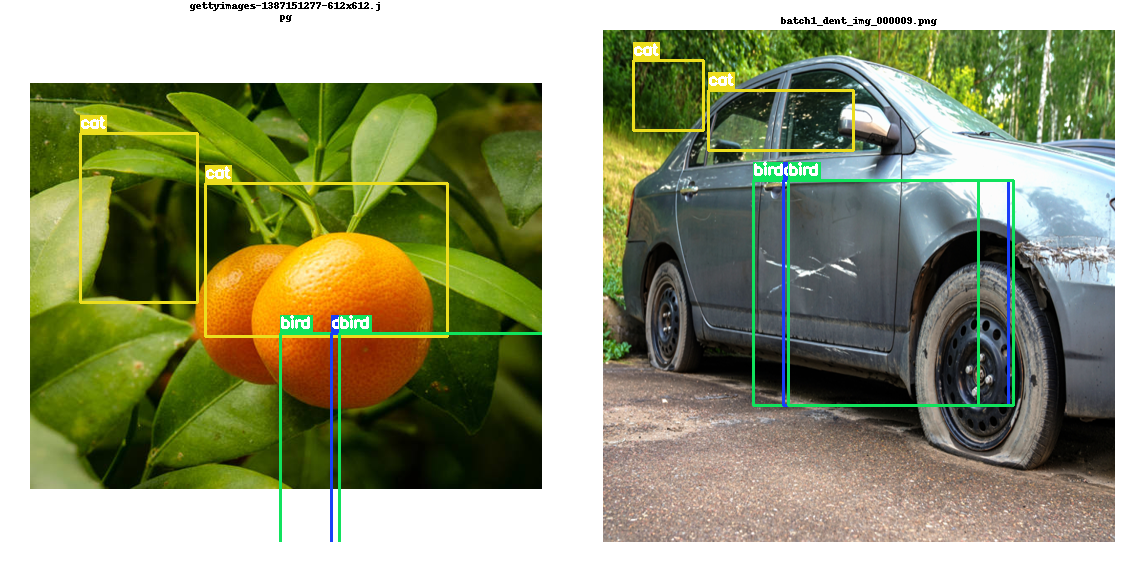

In [6]:
visualizer.show_batch(samples=2,render="pil")

In [7]:
visualizer.show_video(samples = 2)

In [8]:
# dataset.export(to="base" , output_dir="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset" ,copy_images=True)
# dataset.export(to="yolo" , output_dir="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset" ,copy_images=True)
# dataset.export(to="coco" , output_dir="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset" ,copy_images=True)

In [9]:
splited_dataset = dataset.train_test_split(test_size=0.75)

In [10]:
# splited_dataset.save(output_dir = "a" , export_to="yolo") 
# splited_dataset.save(output_dir ="a" , export_to="coco")
# splited_dataset.save(output_dir ="a" , export_to="base")


### check splitted data

In [11]:
dataset = DetDataset("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/a/coco", format="coco")

Processing directory splits:   0%|          | 0/2 [00:00<?, ?it/s]

Processing directory splits: 100%|██████████| 2/2 [00:00<00:00, 22.42it/s]


In [12]:
dataset.show_distribution()

alt.Chart(...)

## Loading via csv


```python
import pandas as pd
# Load YOLO dataset
yolo_df = pd.read_csv("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/yolo/annotations/train.csv")



### YOLO Detection

In [13]:
import os
import pandas as pd
anno_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/yolo/annotations/train" 
img_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/yolo/images/train" 
yolo_img_paths = [os.path.join(img_base_path, img) for img in os.listdir(img_base_path)]
yolo_anno_paths = [os.path.join(anno_base_path, anno) for anno in os.listdir(anno_base_path)]
yolo_split = ["train" for _ in range(len(yolo_img_paths))]
yolo_df = pd.DataFrame({"img_path": yolo_img_paths, "anno_path": yolo_anno_paths, "split": yolo_split})
yolo_df.to_csv("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/yolo/annotations/train.csv", index=False)
yolo_df.head()


,img_path,anno_path,split
0,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
1,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
2,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
3,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train


In [14]:
from core_assist.dataset import DetDataset
dataset = DetDataset(root="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/yolo/annotations/train.csv", format="yolo" , mapping={0:"cat", 1:"bird", 2:"dog"})

Loading annotations from CSV:


Processing CSV: 100%|██████████| 4/4 [00:00<00:00, 33.47it/s]


In [15]:
visualizer = dataset.visualizer(split="train")

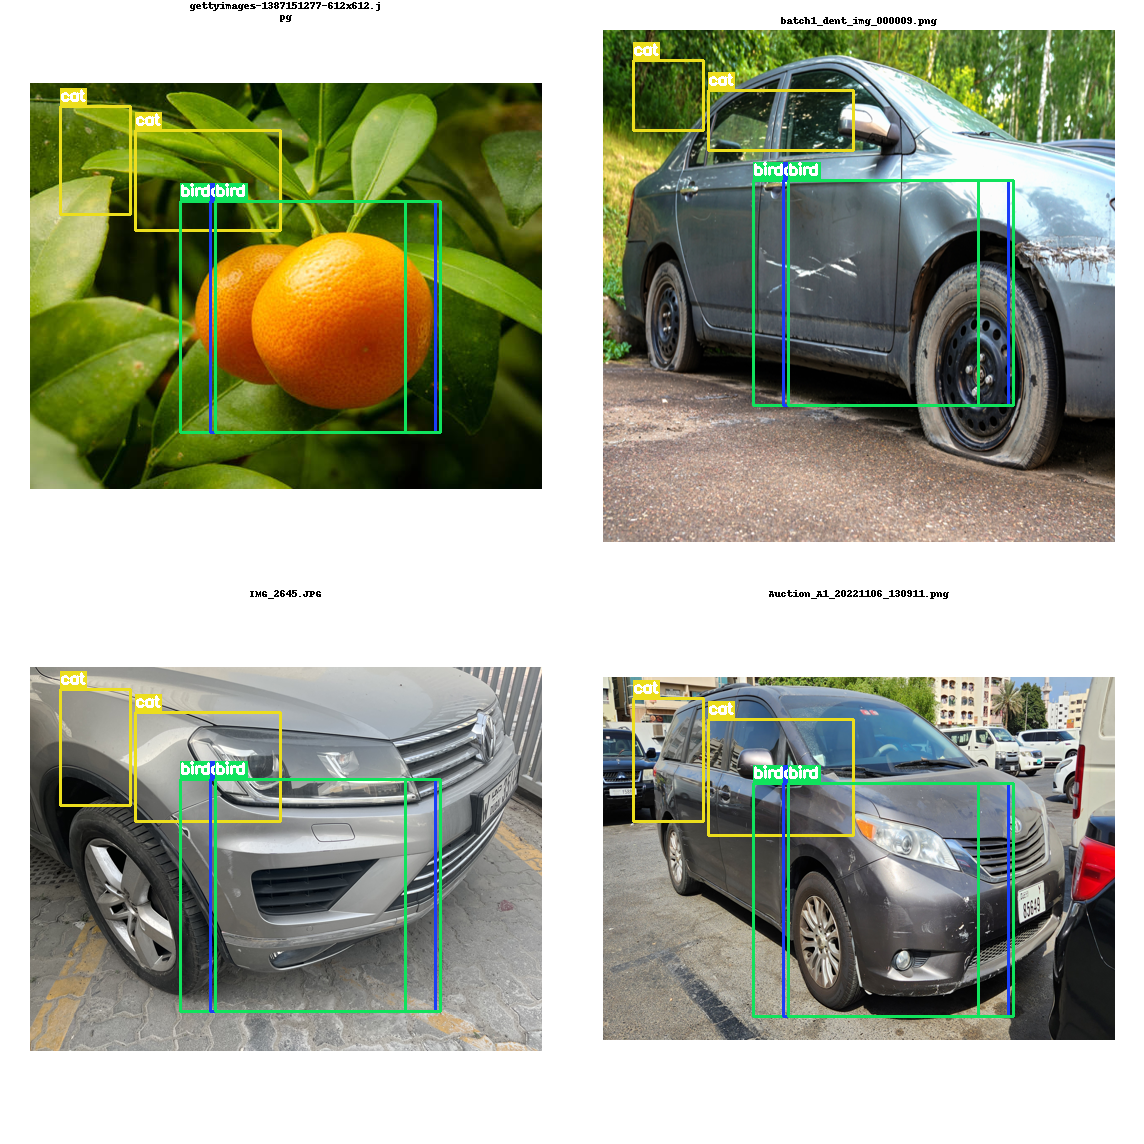

In [16]:
visualizer.show_batch(samples=4 ,render="pil")

### COCO Detection

In [17]:
import os
import pandas as pd
anno_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/coco/annotations/train.json" 
img_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/yolo/images/train" 
yolo_img_paths = [os.path.join(img_base_path, img) for img in os.listdir(img_base_path)]
yolo_anno_paths = [anno_base_path for _ in range(len(yolo_img_paths))]
yolo_split = ["train" for _ in range(len(yolo_img_paths))]
yolo_df = pd.DataFrame({"img_path": yolo_img_paths, "anno_path": yolo_anno_paths, "split": yolo_split})
yolo_df.to_csv("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/coco/annotations/train.csv", index=False)
yolo_df.head()


,img_path,anno_path,split
0,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
1,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
2,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
3,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train


In [18]:
from core_assist.dataset import DetDataset
dataset = DetDataset(root="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset/coco/annotations/train.csv", format="coco")

Processing CSV splits: 100%|██████████| 1/1 [00:00<00:00, 25.69it/s]


In [19]:
dataset.label_df.head()

,image_id,image_width,image_height,x_min,y_min,width,height,category,class_id,image_path,split
0,Auction_A1_20221106_130911.png,1444,1024,84.609375,60.0,112.812500,80.0,cat,0,/home/azureuser/cloudfiles/code/Users/rohit.ch...,
1,Auction_A1_20221106_130911.png,1444,1024,296.132812,120.0,112.812500,0.0,cat,0,/home/azureuser/cloudfiles/code/Users/rohit.ch...,
2,Auction_A1_20221106_130911.png,1444,1024,423.046875,300.0,211.523438,150.0,bird,1,/home/azureuser/cloudfiles/code/Users/rohit.ch...,
3,Auction_A1_20221106_130911.png,1444,1024,507.656250,300.0,126.914062,150.0,dog,2,/home/azureuser/cloudfiles/code/Users/rohit.ch...,
4,Auction_A1_20221106_130911.png,1444,1024,521.757812,300.0,112.812500,150.0,bird,1,/home/azureuser/cloudfiles/code/Users/rohit.ch...,


## Segmentation Dataset

## SegDataset

The SegDataset class is designed for handling segmentation datasets. It supports various formats including COCO, YOLO, and mask formats. The dataset can be used for both instance and semantic segmentation tasks.

Key features:
- Supports multiple segmentation formats (COCO, YOLO, mask)
- Built-in visualization tools for masks and bounding boxes
- Easy conversion between different formats
- Train/test splitting functionality
- Distribution analysis and statistics
- Batch processing capabilities

The dataset expects a CSV file with columns:
- img_path: Path to the image files
- anno_path: Path to the annotation files (COCO JSON, YOLO txt, or mask files)
- split: Dataset split (train/val/test)



In [20]:
from core_assist.dataset import SegDataset

In [21]:
seg_dataset  = SegDataset("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_coco" , format="coco")

Processing directory splits:   0%|          | 0/1 [00:00<?, ?it/s]

Processing directory splits: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


In [22]:
len(seg_dataset.label_df)

167

In [23]:
seg_dataset.show_distribution()

alt.Chart(...)

In [24]:
seg_dataset.bbox_scatter()

alt.Chart(...)

In [25]:
visualizer = seg_dataset.visualizer(split="train" , font_scale=1)

In [26]:
visualizer.show_video(samples = 4 , font_scale=0.5 , thickness=1 ,  bbox_flag=True)

In [27]:
splited_dataset = seg_dataset.train_test_split(test_size=0.5)

In [28]:
# splited_dataset.save("b" , export_to="base")
# splited_dataset.save("b" , export_to="yolo")
# splited_dataset.save("b" , export_to="coco")
# splited_dataset.save("b" , export_to="detectron2")
# splited_dataset.save("b" , export_to="mask")


In [29]:
# seg_dataset.export(to="base" , output_dir="x_seg/base" ,copy_images=True)
# seg_dataset.export(to="yolo" , output_dir="x_seg/yolo" ,copy_images=True)
# seg_dataset.export(to="coco" , output_dir="x_seg/coco" ,copy_images=True)
# seg_dataset.export(to="detectron2" , output_dir="x_seg/detectron2" ,copy_images=True)
# seg_dataset.export(to="mask" , output_dir="x_seg/mask" ,copy_images=True)

In [30]:
from core_assist.dataset import SegDataset

In [31]:
seg_dataset = SegDataset("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_yolo" , format="yolo")

Loading yolo annotations:


train: 0it [00:00, ?it/s]

train: 4it [00:00, 17.64it/s]


In [32]:
seg_dataset.label_df.head()

,split,image_id,image_width,image_height,segmentation,category,image_path,x_min,y_min,width,height,class_id,area
0,train,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': '_^Z?3mo05G7L...",rdm,/home/azureuser/cloudfiles/code/Users/rohit.ch...,490.0,427.0,281.0,127.0,1,27794.0
1,train,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'mWn7W1an0`0G...",fs,/home/azureuser/cloudfiles/code/Users/rohit.ch...,254.0,233.0,109.0,94.0,2,8168.0
2,train,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'YTR<7go0`0@`...",b,/home/azureuser/cloudfiles/code/Users/rohit.ch...,386.0,111.0,514.0,205.0,3,79890.0
3,train,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'mYe<1oo01O1O...",fnp,/home/azureuser/cloudfiles/code/Users/rohit.ch...,405.0,280.0,763.0,154.0,4,74862.0
4,train,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'PcXk0=co00O?...",fb,/home/azureuser/cloudfiles/code/Users/rohit.ch...,872.0,574.0,230.0,100.0,5,15379.0


In [33]:
len(seg_dataset.label_df)

168

In [34]:
seg_dataset.bbox_stats()

,x_min,y_min,width,height
count,168.000000,168.000000,168.000000,168.000000
mean,594.886905,384.428571,166.464286,165.642857
std,367.709962,236.377998,231.317442,176.175514
min,118.000000,0.000000,1.000000,1.000000
25%,246.250000,182.000000,21.500000,28.750000
50%,496.000000,366.500000,73.500000,127.500000
75%,874.500000,560.000000,202.500000,236.000000
max,1305.000000,839.000000,1212.000000,961.000000


## Loading Via csv

### coco Segmentation

In [35]:
"/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_coco"
import os
import pandas as pd
anno_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_coco/annotations/train.json" 
img_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_coco/images" 
yolo_img_paths = [os.path.join(img_base_path, img) for img in os.listdir(img_base_path)]
yolo_anno_paths = [anno_base_path for _ in range(len(yolo_img_paths))]
# yolo_split = ["train" for _ in range(len(yolo_img_paths))]
# yolo_df = pd.DataFrame({"img_path": yolo_img_paths, "anno_path": yolo_anno_paths, "split": yolo_split})
yolo_df = pd.DataFrame({"img_path": yolo_img_paths, "anno_path": yolo_anno_paths})
yolo_df.to_csv("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_coco/annotations/train.csv", index=False)
yolo_df.head()


,img_path,anno_path
0,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...
1,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...
2,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...
3,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...


In [36]:
from core_assist.dataset import SegDataset
seg_dataset  = SegDataset("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_coco/annotations/train.csv" , format="coco")

Processing CSV splits: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


In [37]:
len(seg_dataset.label_df)

167

In [38]:
seg_dataset.show_distribution()

alt.Chart(...)

### YOLO segmentation 

In [39]:
import os
import pandas as pd
anno_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_yolo/annotations/train" 
img_base_path =  "/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_yolo/images/train" 
yolo_img_paths = [os.path.join(img_base_path, img) for img in os.listdir(img_base_path)]
yolo_anno_paths = [os.path.join(anno_base_path, anno) for anno in os.listdir(anno_base_path)]
yolo_split = ["train" for _ in range(len(yolo_img_paths))]
yolo_df = pd.DataFrame({"img_path": yolo_img_paths, "anno_path": yolo_anno_paths, "split": yolo_split})
yolo_df.to_csv("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_yolo/annotations/train.csv", index=False)
yolo_df.head()


,img_path,anno_path,split
0,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
1,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
2,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train
3,/home/azureuser/cloudfiles/code/Users/rohit.ch...,/home/azureuser/cloudfiles/code/Users/rohit.ch...,train


In [40]:
from core_assist.dataset import SegDataset
seg_dataset  = SegDataset("/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/seg_yolo/annotations/train.csv" , format="yolo" , mapping={1: 'rhl', 2: 'rdm', 3: 'fs', 4: 'b', 5: 'fnp', 6: 'fb', 7: 'ldm', 8: 'ol', 9: 'lhl', 10: 'lfw', 11: 'rfd', 12: 'rfl', 13: 'rfb', 14: 'lfl', 15: 'lfb', 16: 'rrg', 17: 'rfg', 18: 'rqg', 19: 'rrh', 20: 'rfh', 21: 'rq', 22: 'rb', 23: 'rrw', 24: 'rrt', 25: 'rft', 26: 'lff', 27: 'rrp', 28: 'lrp', 29: 'g', 30: 'feb', 31: 'fwp', 32: 'rfa', 33: 'rra', 34: 'rrr', 35: 'an', 36: 'lrr', 37: 'rf', 38: 'rff', 39: 'rfw_ap', 40: 'rrw_ap', 41: 'rrd', 42: 'rfw', 43: 'fb_g', 44: 'rtl', 45: 'rsp', 46: 'w_bt', 47: 'rf_qg', 48: 'lrd', 49: 'lfd', 50: 'lrw', 51: 'lq', 52: 'lft', 53: 'fc', 54: 'lrt', 55: 'ltl', 56: 'lsp', 57: 'lfh', 58: 'lrh', 59: 'lfg', 60: 'lrg', 61: 'ddk', 62: 'lfa', 63: 'lra', 64: 'ata', 65: 'fps', 66: 'fhc', 67: 'rhw', 68: 'lhw', 69: 'rps'})

Loading yolo annotations from CSV:


Processing CSV:   0%|          | 0/4 [00:00<?, ?it/s]

Processing CSV: 100%|██████████| 4/4 [00:00<00:00,  8.77it/s]


In [41]:
seg_dataset.label_df.head()

,split,image_id,image_width,image_height,segmentation,category,image_path,class_id,x_min,y_min,width,height,area
0,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'bg`h0b0Zn0T1...",lrd,/home/azureuser/cloudfiles/code/Users/rohit.ch...,48.0,784.0,301.0,383.0,471.0,118943.0
1,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'n^a=W2^m0j0V...",lfd,/home/azureuser/cloudfiles/code/Users/rohit.ch...,49.0,433.0,394.0,368.0,379.0,126790.0
2,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': ']aR62lo04M4L...",lff,/home/azureuser/cloudfiles/code/Users/rohit.ch...,26.0,194.0,374.0,259.0,396.0,45079.0
3,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'cgi7a0]o0b0]...",lfw,/home/azureuser/cloudfiles/code/Users/rohit.ch...,10.0,249.0,688.0,127.0,185.0,18494.0
4,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'ecd4^1Um0`1I...",ol,/home/azureuser/cloudfiles/code/Users/rohit.ch...,8.0,148.0,103.0,1150.0,819.0,688720.0


In [42]:
seg_dataset.show_distribution()

alt.Chart(...)